<a href="https://colab.research.google.com/github/Reemaalt/Detection-of-Hallucination-in-Arabic/blob/main/ThresholdExp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json

def count_non_hallucinated_questions(input_file):
    # Load the data
    with open(input_file, 'r', encoding='utf-8') as f:
        data = json.load(f)

    # Ensure the data is a list
    if not isinstance(data, list):
        raise ValueError("Expected the input JSON to be a list of question items.")

    # Filter and count non-hallucinated questions based on human label
    non_hallucinated = [item for item in data if item.get("human_question_label") == "Non-Hallucinated"]
    count = len(non_hallucinated)

    print(f"Number of non-hallucinated questions: {count}")
    print("Non-hallucinated questions:", json.dumps(non_hallucinated, ensure_ascii=False, indent=4))

    return count

# Update the file path as needed
input_file = "/content/All_Labeled_ALLaM_XOR.json.json"


count_non_hallucinated_questions(input_file)


Number of non-hallucinated questions: 49
Non-hallucinated questions: [
    {
        "question": "ما هي أولى جامعات فنلندا؟",
        "original_answer": "أكاديمية توركو",
        "answers": [
            [
                {
                    "text": "جامعة هلسنكي وجامعة توركو",
                    "RougeL_label": "Hallucinated",
                    "human_label": "Non-Hallucinated"
                },
                {
                    "text": "جامعة هلسنكي",
                    "RougeL_label": "Hallucinated",
                    "human_label": "Hallucinated"
                },
                {
                    "text": "جامعة هلسنكي",
                    "RougeL_label": "Hallucinated",
                    "human_label": "Hallucinated"
                },
                {
                    "text": "جامعة هلسنكي وجامعة توركو",
                    "RougeL_label": "Hallucinated",
                    "human_label": "Non-Hallucinated"
                },
                {
          

49

# finding optimal threshold on human sample

Optimal cluster threshold: 1


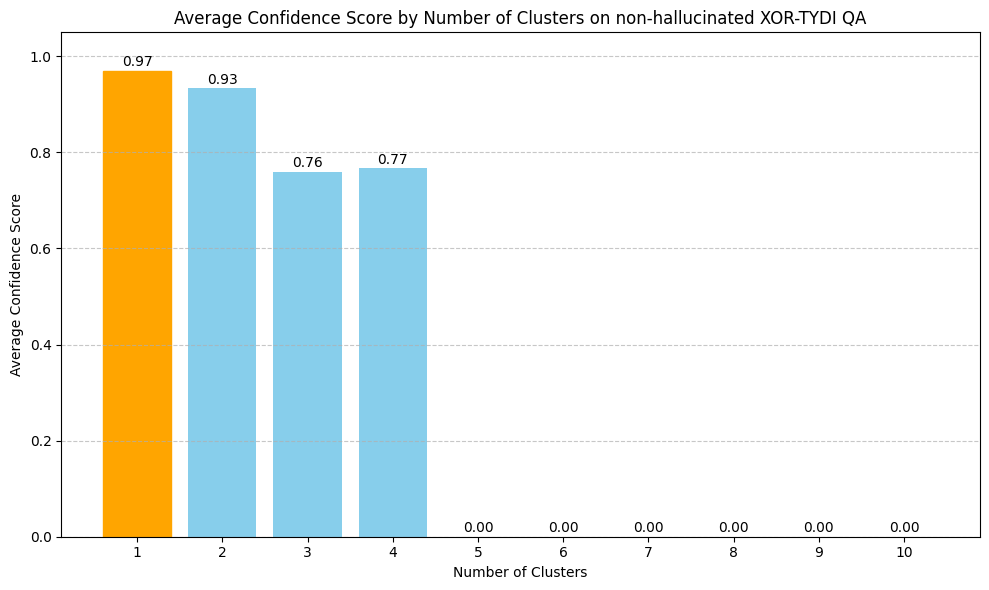

In [5]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load JSON file
with open("/content/All_Labeled_ALLaM_XOR.json.json", "r", encoding="utf-8") as file:
    data = json.load(file)

# Dictionary to store confidence scores for each cluster number (1 to 10)
confidence_scores = {i: [] for i in range(1, 11)}
questions_with_seven_clusters = []

# Process each question
for question_data in data:
    if question_data.get("human_question_label") == "Non-Hallucinated":
        clusters = question_data.get("answers", [])
        num_clusters = question_data.get("num_clusters", len(clusters))

        non_hallucinated_count = sum(
            1 for cluster in clusters for ans in cluster
            if ans.get("human_label") == "Non-Hallucinated"
        )
        confidence_score = non_hallucinated_count / 10.0

        if 1 <= num_clusters <= 10:
            confidence_scores[num_clusters].append(confidence_score)

        if num_clusters == 7:
            questions_with_seven_clusters.append(question_data.get("question", "N/A"))

# Compute average confidence scores
average_confidence_scores = {
    clusters: np.mean(scores) if scores else 0 for clusters, scores in confidence_scores.items()
}

# Find optimal threshold
optimal_threshold = max(average_confidence_scores, key=average_confidence_scores.get)
print("Optimal cluster threshold:", optimal_threshold)

# --- Visualization ---
cluster_counts = list(average_confidence_scores.keys())
avg_scores = list(average_confidence_scores.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(cluster_counts, avg_scores, color='skyblue')

# Highlight the optimal bar
bars[optimal_threshold - 1].set_color('orange')

# Add text labels
for i, score in enumerate(avg_scores):
    plt.text(cluster_counts[i], score + 0.01, f"{score:.2f}", ha='center')

plt.title("Average Confidence Score by Number of Clusters on non-hallucinated XOR-TYDI QA")
plt.xlabel("Number of Clusters")
plt.ylabel("Average Confidence Score")
plt.xticks(cluster_counts)
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("AvgConf.png", dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
import json
import numpy as np

# Load JSON file
with open("/content/All_Labeled_ALLaM_XOR.json.json", "r", encoding="utf-8") as file:
    data = json.load(file)

# Dictionary to store confidence scores for each cluster number (1 to 10)
confidence_scores = {i: [] for i in range(1, 11)}

# Loop through each question item in the list
for question_data in data:
    # Filter only questions labeled as "Non-Hallucinated"
    if question_data.get("human_question_label") == "Non-Hallucinated":
        clusters = question_data.get("answers", [])
        num_clusters = question_data.get("num_clusters", len(clusters))

        # Compute confidence score (number of non-hallucinated answers out of 10)
        non_hallucinated_count = sum(
            1 for cluster in clusters for ans in cluster
            if ans.get("human_label") == "Non-Hallucinated"
        )
        confidence_score = non_hallucinated_count / 10.0

        if 1 <= num_clusters <= 10:
            confidence_scores[num_clusters].append(confidence_score)

# Compute the average confidence score for each cluster count
average_confidence_scores = {
    clusters: np.mean(scores) if scores else 0 for clusters, scores in confidence_scores.items()
}

# Print confidence scores dictionary
print("Confidence scores by cluster count XOR-TYDI QA:", confidence_scores)

# Find the optimal threshold (highest average confidence score)
optimal_threshold = max(average_confidence_scores, key=average_confidence_scores.get)
print("Optimal cluster threshold:", optimal_threshold)


Confidence scores by cluster count: {1: [0.7, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 1.0, 1.0, 1.0, 0.9], 2: [1.0, 1.0, 1.0, 0.9, 0.9, 1.0, 1.0, 1.0, 0.9, 0.8, 0.7, 1.0], 3: [0.8, 1.0, 0.5, 0.6, 0.9], 4: [0.7, 0.6, 0.9, 0.8, 0.9, 0.7], 5: [], 6: [], 7: [], 8: [], 9: [], 10: []}
Optimal cluster threshold: 1


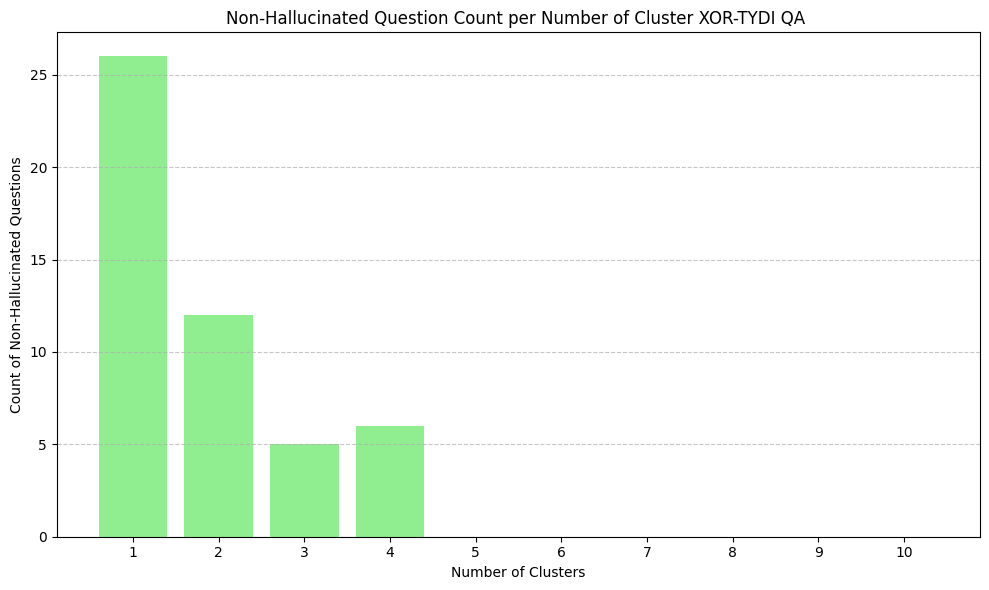

In [9]:
import matplotlib.pyplot as plt

# Count of "Non-Hallucinated" questions per cluster
non_hallucinated_counts = {i: len(confidence_scores[i]) for i in range(1, 11)}

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(non_hallucinated_counts.keys(), non_hallucinated_counts.values(), color='lightgreen')
plt.xlabel("Number of Clusters")
plt.ylabel("Count of Non-Hallucinated Questions")
plt.title("Non-Hallucinated Question Count per Number of Cluster XOR-TYDI QA ")
plt.xticks(range(1, 11))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("numberofquestionspercluster.png", dpi=300, bbox_inches='tight')
plt.show()


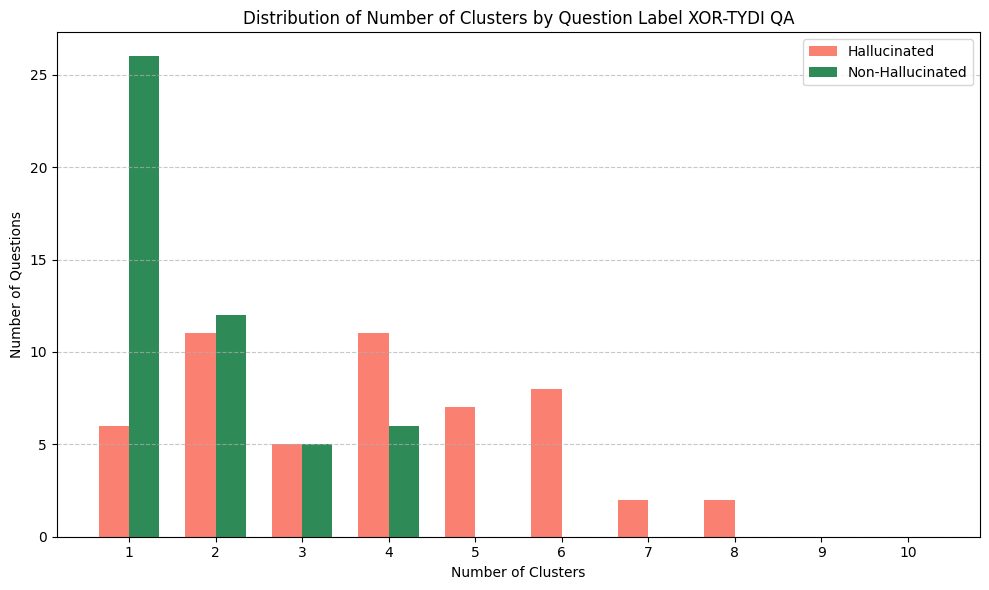

In [6]:
import matplotlib.pyplot as plt
from collections import Counter

# Separate counters for cluster numbers by question label
hallucinated_clusters = []
non_hallucinated_clusters = []

for question_data in data:
    label = question_data.get("human_question_label")
    clusters = question_data.get("answers", [])
    num_clusters = question_data.get("num_clusters", len(clusters))

    if 1 <= num_clusters <= 10:
        if label == "Hallucinated":
            hallucinated_clusters.append(num_clusters)
        elif label == "Non-Hallucinated":
            non_hallucinated_clusters.append(num_clusters)

# Count occurrences
hallucinated_counter = Counter(hallucinated_clusters)
non_hallucinated_counter = Counter(non_hallucinated_clusters)

# X-axis cluster values
cluster_range = list(range(1, 11))
hallucinated_counts = [hallucinated_counter.get(i, 0) for i in cluster_range]
non_hallucinated_counts = [non_hallucinated_counter.get(i, 0) for i in cluster_range]

# --- Visualization: Cluster Count Distribution by Label ---
x = np.arange(len(cluster_range))  # X positions
width = 0.35  # Bar width

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, hallucinated_counts, width, label='Hallucinated', color='salmon')
plt.bar(x + width/2, non_hallucinated_counts, width, label='Non-Hallucinated', color='seagreen')

plt.xlabel("Number of Clusters")
plt.ylabel("Number of Questions")
plt.title("Distribution of Number of Clusters by Question Label XOR-TYDI QA")
plt.xticks(x, cluster_range)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("numberofquestions.png", dpi=300, bbox_inches='tight')
plt.show()




#threshold label the human sample

In [ ]:

# Create a new labeled dataset using the optimal threshold
new_data = []

for question_data in data:
    num_clusters = question_data.get("num_clusters", len(question_data.get("answers", [])))
    threshold_label = "Hallucinated" if num_clusters > optimal_threshold else "Non-Hallucinated"

    # Add the threshold label to the existing question data
    updated_question = {**question_data, "threshold_label": threshold_label}
    new_data.append(updated_question)

# Save the new JSON file with the updated threshold label
new_file_name = "labeled_sample_XOR_AllamdataThreshold.json"
with open(new_file_name, "w", encoding="utf-8") as f:
    json.dump(new_data, f, ensure_ascii=False, indent=4)

print(f"Threshold-labeled file saved as '{new_file_name}'.")



Threshold-labeled file saved as 'labeled_sample_XOR_AllamdataThreshold.json'.


Unique true labels and their counts: {0: 19, 1: 81}
AUROC Score: 0.7833
AUROC Score: 0.7833


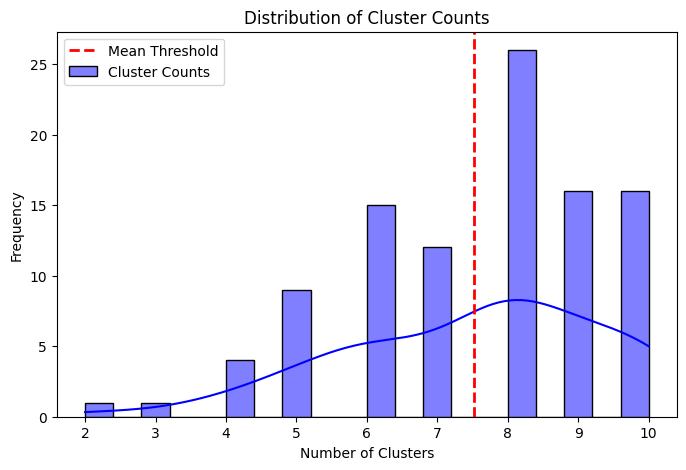

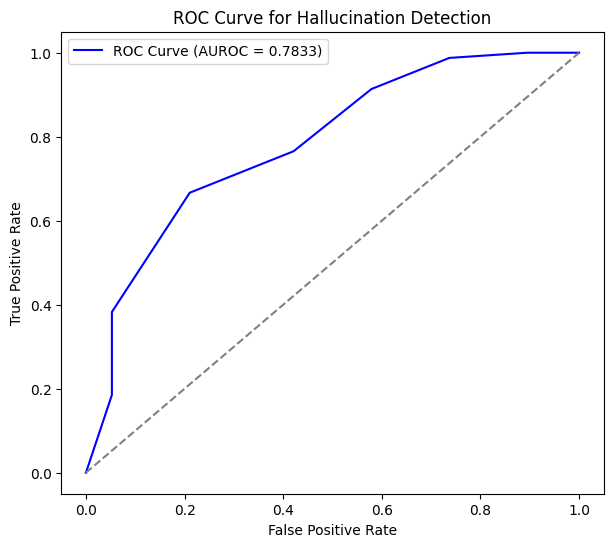

In [ ]:
#evaluation on sample
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve

# Load the dataset with the new threshold-based labels
with open("/content/labeled_sample_XOR_dataThreshold_auroc.json", "r", encoding="utf-8") as file:
    data = json.load(file)

# Extract ground truth labels and predicted labels
true_labels = []
pred_scores = []  # This will store the number of clusters (used as a score)
predicted_labels = []  # This will store the predicted labels based on the threshold

for question_id, question_data in data.items():
    # Convert string labels to numerical (1 = hallucinated, 0 = non-hallucinated)
    true_label = 1 if question_data.get("question_label") == "Hallucinated" else 0
    predicted_label = 1 if question_data.get("threshold_label") == "Hallucinated" else 0

    # Store ground truth and predicted scores
    true_labels.append(true_label)
    pred_scores.append(len(question_data.get("clusters", [])))  # Use cluster count as a prediction score
    predicted_labels.append(predicted_label)
# Debug: Print unique values in true_labels
print("Unique true labels and their counts:", {label: true_labels.count(label) for label in set(true_labels)})

# Ensure there are both classes (0 and 1) before computing AUROC
if len(set(true_labels)) < 2:
    print("Error: Only one class is present in true_labels. AUROC cannot be computed.")
else:
    auroc = roc_auc_score(true_labels, pred_scores)
    print(f"AUROC Score: {auroc:.4f}")
# Compute AUROC score
auroc = roc_auc_score(true_labels, pred_scores)
print(f"AUROC Score: {auroc:.4f}")

# Plot Histogram of Cluster Counts
plt.figure(figsize=(8, 5))
sns.histplot(pred_scores, bins=20, kde=True, color='blue', label="Cluster Counts")
plt.axvline(np.mean(pred_scores), color='red', linestyle='dashed', linewidth=2, label="Mean Threshold")
plt.xlabel("Number of Clusters")
plt.ylabel("Frequency")
plt.title("Distribution of Cluster Counts")
plt.legend()
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(true_labels, pred_scores)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUROC = {auroc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Hallucination Detection")
plt.legend()
plt.show()




# start here after finding optimal threshold for the dataset on sample genralize across models and all generations

In [26]:
import json

# Load the dataset
with open("/content/finalTransWithSE_QwenXOR_rougel_isri.json", "r", encoding="utf-8") as file:
    data = json.load(file)



# Create a new labeled dataset using the optimal threshold
new_data = []
for question_data in data:
    num_clusters = question_data.get("num_clusters", len(question_data.get("answers", [])))
    threshold_label = "Hallucinated" if num_clusters > optimal_threshold else "Non-Hallucinated"

    # Add the new label and append the updated dict to the list
    question_data["threshold_label"] = threshold_label
    new_data.append(question_data)

# Save the new JSON file
new_file_name = "labeled_QwenfullXOR_dataThreshold.json"
with open(new_file_name, "w", encoding="utf-8") as f:
    json.dump(new_data, f, ensure_ascii=False, indent=4)

print(f"Threshold-labeled file saved as '{new_file_name}'.")


Threshold-labeled file saved as 'labeled_QwenfullXOR_dataThreshold.json'.


#Auroc to show how well the number of cluster distinguish between hallucinations and non halllucinations in a threshold independent setting

Unique true labels and their counts: {0: 21, 1: 687}
AUROC Score: 0.6966


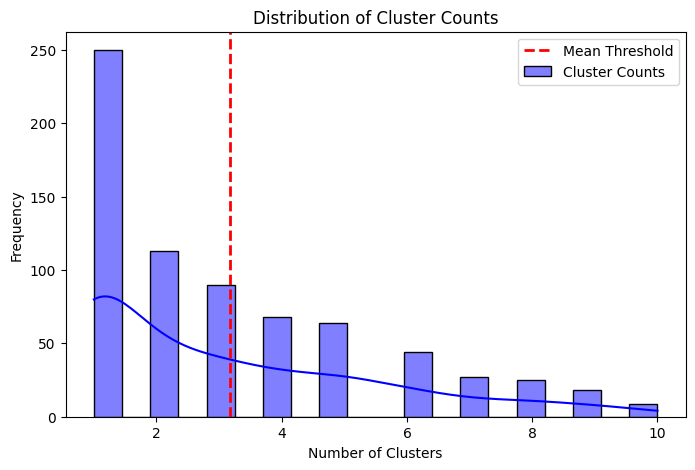

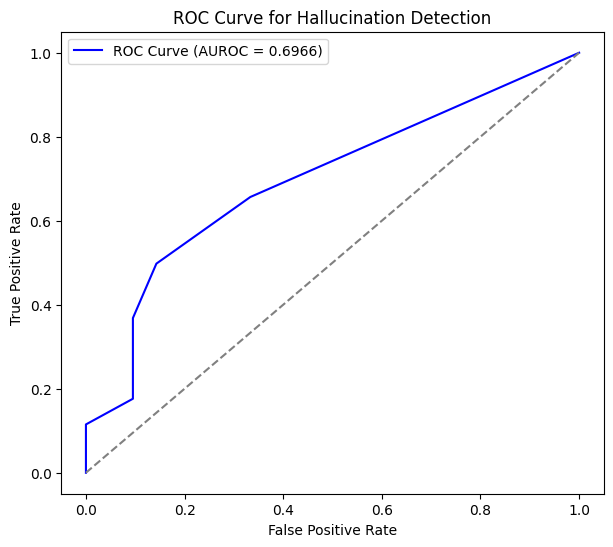


Final Statistics:
Computed Labels - Hallucinated: 687, Non-Hallucinated: 21
Threshold Labels - Hallucinated: 458, Non-Hallucinated: 250


In [27]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve

# Load the dataset with the new threshold-based labels
with open("/content/labeled_QwenfullXOR_dataThreshold.json", "r", encoding="utf-8") as file:
    data = json.load(file)

# Extract ground truth labels and predicted labels
true_labels = []
pred_scores = []  # This will store the number of clusters (used as a score)
predicted_labels = []  # This will store the predicted labels based on the threshold

# Counters for computed and threshold labels
computed_hallucinated = 0
computed_non_hallucinated = 0
threshold_hallucinated = 0
threshold_non_hallucinated = 0

for question_data in data:
    # Convert string labels to numerical (1 = hallucinated, 0 = non-hallucinated)
    computed_label = question_data.get("computed_question_label")
    threshold_label = question_data.get("threshold_label")

    true_label = 1 if computed_label == "Hallucinated" else 0
    predicted_label = 1 if threshold_label == "Hallucinated" else 0

    # Store ground truth and predicted scores
    true_labels.append(true_label)
    pred_scores.append(question_data.get("num_clusters", len(question_data.get("answers", []))))
    predicted_labels.append(predicted_label)

    # Count computed labels
    if computed_label == "Hallucinated":
        computed_hallucinated += 1
    else:
        computed_non_hallucinated += 1

    # Count threshold labels
    if threshold_label == "Hallucinated":
        threshold_hallucinated += 1
    else:
        threshold_non_hallucinated += 1

# Debug: Print unique values in true_labels
print("Unique true labels and their counts:", {label: true_labels.count(label) for label in set(true_labels)})

# Ensure there are both classes (0 and 1) before computing AUROC
if len(set(true_labels)) < 2:
    print("Error: Only one class is present in true_labels. AUROC cannot be computed.")
else:
    auroc = roc_auc_score(true_labels, pred_scores)
    print(f"AUROC Score: {auroc:.4f}")

    # Plot Histogram of Cluster Counts
    plt.figure(figsize=(8, 5))
    sns.histplot(pred_scores, bins=20, kde=True, color='blue', label="Cluster Counts")
    plt.axvline(np.mean(pred_scores), color='red', linestyle='dashed', linewidth=2, label="Mean Threshold")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Frequency")
    plt.title("Distribution of Cluster Counts")
    plt.legend()
    plt.show()

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(true_labels, pred_scores)
    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUROC = {auroc:.4f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random classifier line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Hallucination Detection")
    plt.legend()
    plt.show()

# Print final statistics
print("\nFinal Statistics:")
print(f"Computed Labels - Hallucinated: {computed_hallucinated}, Non-Hallucinated: {computed_non_hallucinated}")
print(f"Threshold Labels - Hallucinated: {threshold_hallucinated}, Non-Hallucinated: {threshold_non_hallucinated}")


#Accuracy to show how good our threshold is compared to ground truth by rouge-l labels

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute classification metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.6568
Precision: 0.9847
Recall: 0.6565
F1 Score: 0.7878
